In [183]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nba-games/games.csv
/kaggle/input/nba-games/teams.csv
/kaggle/input/nba-games/games_details.csv
/kaggle/input/nba-games/players.csv
/kaggle/input/nba-games/ranking.csv


# The Data present is from 2004-2020

In [184]:
game_details = pd.read_csv('/kaggle/input/nba-games/games_details.csv')
game_details.columns


Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS'],
      dtype='object')

In [185]:
round(100*(game_details.isnull().sum()/len(game_details.index)),2)

GAME_ID               0.00
TEAM_ID               0.00
TEAM_ABBREVIATION     0.00
TEAM_CITY             0.00
PLAYER_ID             0.00
PLAYER_NAME           0.00
START_POSITION       61.62
COMMENT              84.00
MIN                  16.00
FGM                  16.00
FGA                  16.00
FG_PCT               16.00
FG3M                 16.00
FG3A                 16.00
FG3_PCT              16.00
FTM                  16.00
FTA                  16.00
FT_PCT               16.00
OREB                 16.00
DREB                 16.00
REB                  16.00
AST                  16.00
STL                  16.00
BLK                  16.00
TO                   16.00
PF                   16.00
PTS                  16.00
PLUS_MINUS           20.10
dtype: float64

In [186]:
game_details.drop(['GAME_ID','TEAM_ID','PLAYER_ID','START_POSITION','COMMENT','TEAM_ABBREVIATION'],axis = 1,inplace= True)

In [244]:
game_details['FTL'] = game_details['FTA'] - game_details['FTM']

In [188]:
game_details = game_details.dropna()

In [189]:
game_details.shape

(460860, 22)

In [190]:
game_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460860 entries, 0 to 574122
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   TEAM_CITY    460860 non-null  object 
 1   PLAYER_NAME  460860 non-null  object 
 2   MIN          460860 non-null  object 
 3   FGM          460860 non-null  float64
 4   FGA          460860 non-null  float64
 5   FG_PCT       460860 non-null  float64
 6   FG3M         460860 non-null  float64
 7   FG3A         460860 non-null  float64
 8   FG3_PCT      460860 non-null  float64
 9   FTM          460860 non-null  float64
 10  FTA          460860 non-null  float64
 11  FT_PCT       460860 non-null  float64
 12  OREB         460860 non-null  float64
 13  DREB         460860 non-null  float64
 14  REB          460860 non-null  float64
 15  AST          460860 non-null  float64
 16  STL          460860 non-null  float64
 17  BLK          460860 non-null  float64
 18  TO           460860 non-

In [191]:
game_details['MIN'] = game_details['MIN'].str.strip(':').str[0:2]

In [193]:
df = game_details.copy()

[Text(0, 0.5, 'PLAYER_NAME'), Text(0.5, 0, 'POINTS')]

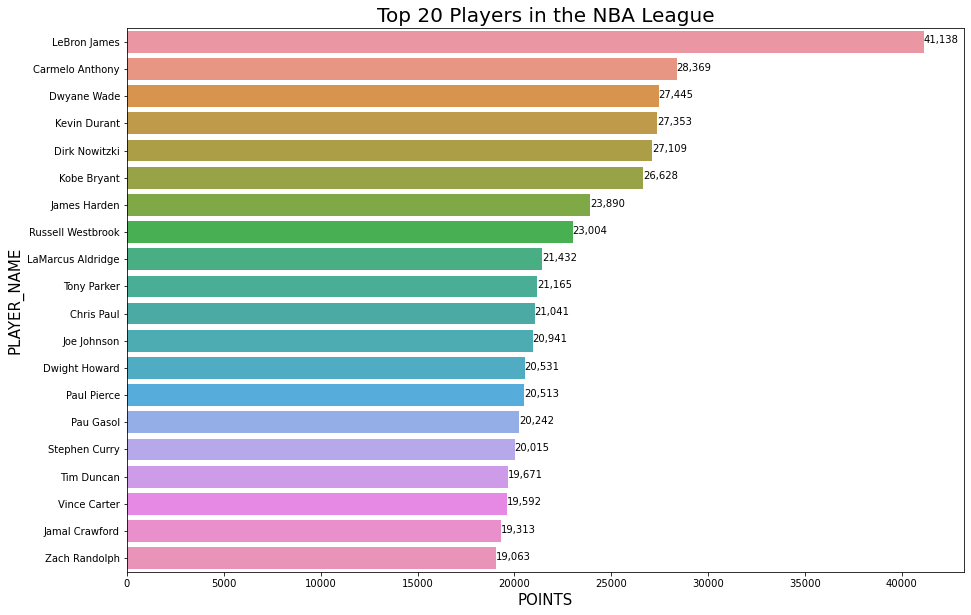

In [251]:
top_activities = df.groupby(by='PLAYER_NAME')['PTS'].sum().sort_values(ascending =False).head(20).reset_index()
plt.figure(figsize=(15,10))
plt.xlabel('POINTS',fontsize=15)
plt.ylabel('PLAYER_NAME',fontsize=15)
plt.title('Top 20 Players in the NBA League',fontsize = 20)
ax = sns.barplot(x=top_activities['PTS'],y = top_activities['PLAYER_NAME'])
for i ,(value,name) in enumerate (zip(top_activities['PTS'],top_activities['PLAYER_NAME'])):
    ax.text(value, i-.05,f'{value:,.0f}',size = 10,ha='left',va='center')
ax.set(xlabel='POINTS',ylabel='PLAYER_NAME')

### Just a quick reminder to Kobe fans, the data is from 2004-2020

## Let us take a look at some stats of the BEST PLAYER in the league

### 1. LeBron James

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 <a list of 53 Text major ticklabel objects>)

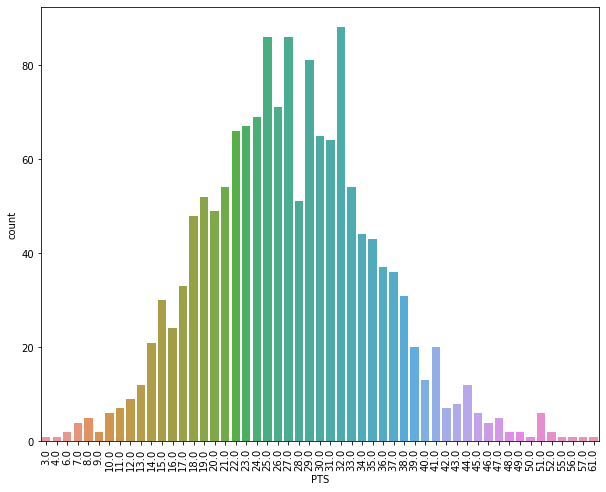

In [239]:
player = df.groupby(['PLAYER_NAME'])
Bron = player.get_group('LeBron James')

plt.figure(figsize=(10,8))
plt.xlabel('POINTS',fontsize = 10)
sns.countplot(Bron['PTS'])
#sns.countplot(Bron['REB'])

plt.xticks(rotation = 90)

- This graph cleary shows the dominance KING JAMES had over the NBA from 2004-2020

## Lets see LeBron Laker VS LeBron Miami

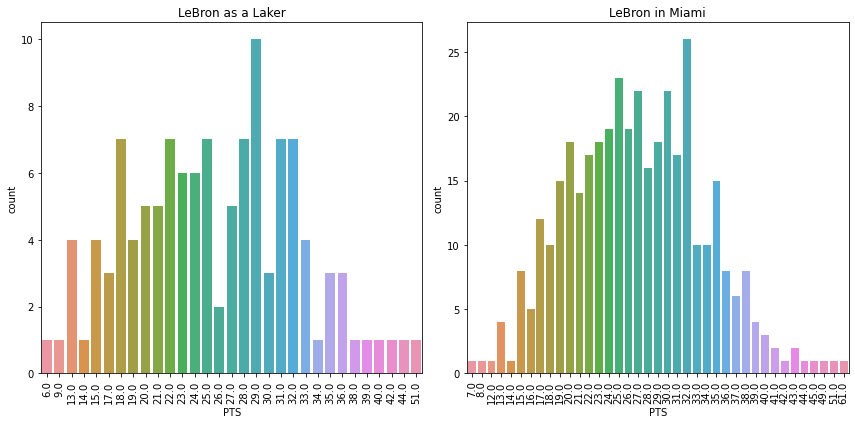

In [235]:
Bron_Team = Bron.groupby('TEAM_CITY')
Bron_LA = Bron_Team.get_group('Los Angeles')
Bron_MIAMI = Bron_Team.get_group('Miami')

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.xlabel('POINTS',fontsize = 10)
plt.title("LeBron as a Laker",fontsize = 12)
sns.countplot(Bron_LA['PTS'])
#sns.countplot(Bron_LA['REB'])
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
#plt.figure(figsize=(8,6))
plt.title("LeBron in Miami",fontsize = 12)
plt.xlabel('POINTS',fontsize = 10)
sns.countplot(Bron_MIAMI['PTS'])
#sns.countplot(Bron_LA['REB'])
plt.xticks(rotation = 90)

plt.tight_layout()

plt.show()


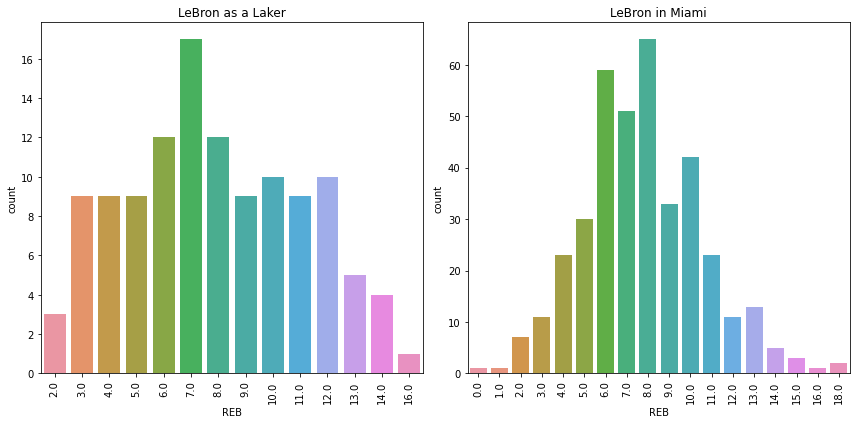

In [237]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.xlabel('REBOUNDS',fontsize = 10)
plt.title("LeBron as a Laker",fontsize = 12)
sns.countplot(Bron_LA['REB'])
#sns.countplot(Bron_LA['REB'])
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
#plt.figure(figsize=(8,6))
plt.title("LeBron in Miami",fontsize = 12)
plt.xlabel('REBOUNDS',fontsize = 10)
sns.countplot(Bron_MIAMI['REB'])
#sns.countplot(Bron_LA['REB'])
plt.xticks(rotation = 90)

plt.tight_layout()

plt.show()


### We can clearly see that LBJ had a better career at MIAMI
### It is quite profound on Lebron's performance as Miami Heat 

- Note he was in Miami for 4 years.
- He has been a Laker only for 2 years now.


[Text(0, 0.5, 'PLAYER_NAME'), Text(0.5, 0, 'POINTS')]

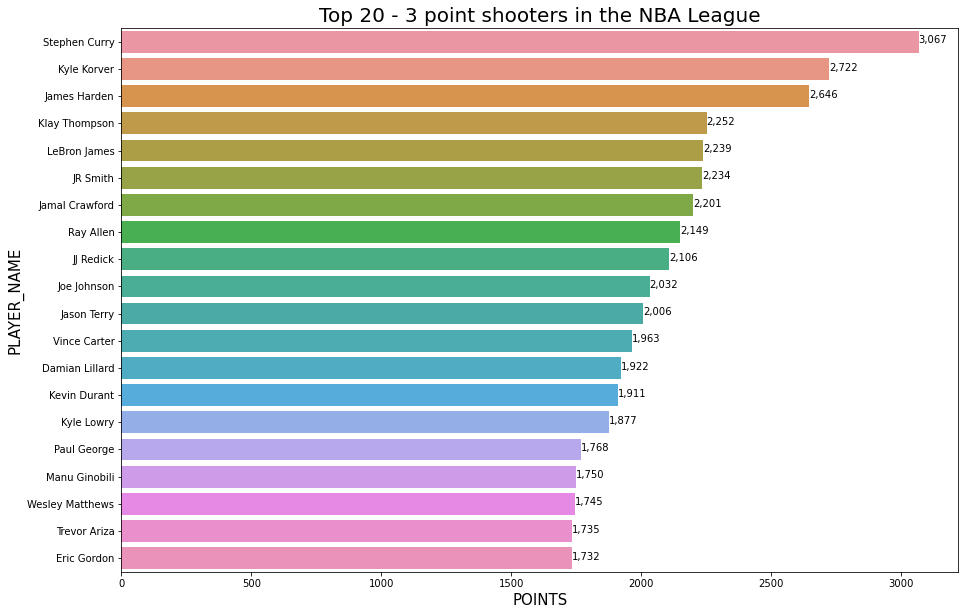

In [242]:
top_3Pointers = df.groupby(by='PLAYER_NAME')['FG3M'].sum().sort_values(ascending =False).head(20).reset_index()
plt.figure(figsize=(15,10))
plt.xlabel('POINTS',fontsize=15)
plt.ylabel('PLAYER_NAME',fontsize=15)
plt.title('Top 20 - 3 point shooters in the NBA League',fontsize = 20)
ax = sns.barplot(x=top_3Pointers['FG3M'],y = top_3Pointers['PLAYER_NAME'])
for i ,(value,name) in enumerate (zip(top_3Pointers['FG3M'],top_3Pointers['PLAYER_NAME'])):
    ax.text(value, i-.05,f'{value:,.0f}',size = 10,ha='left',va='center')
ax.set(xlabel='POINTS',ylabel='PLAYER_NAME')

### This graph clearly shows how Stephen Curry has dominated the 3 Pointer Division by far

- Note Steph Curry made his debut in the **NBA in 2009** and the data we are comparing him with is from 2004. 

In [247]:
df['FTL'] = df['FTA'] - df['FTM']
top_Shaqtin = df.groupby(by='PLAYER_NAME')['FTL'].sum().sort_values(ascending =False).head(20).reset_index()

[Text(0, 0.5, 'PLAYER_NAME'), Text(0.5, 0, 'Free-Throw losses')]

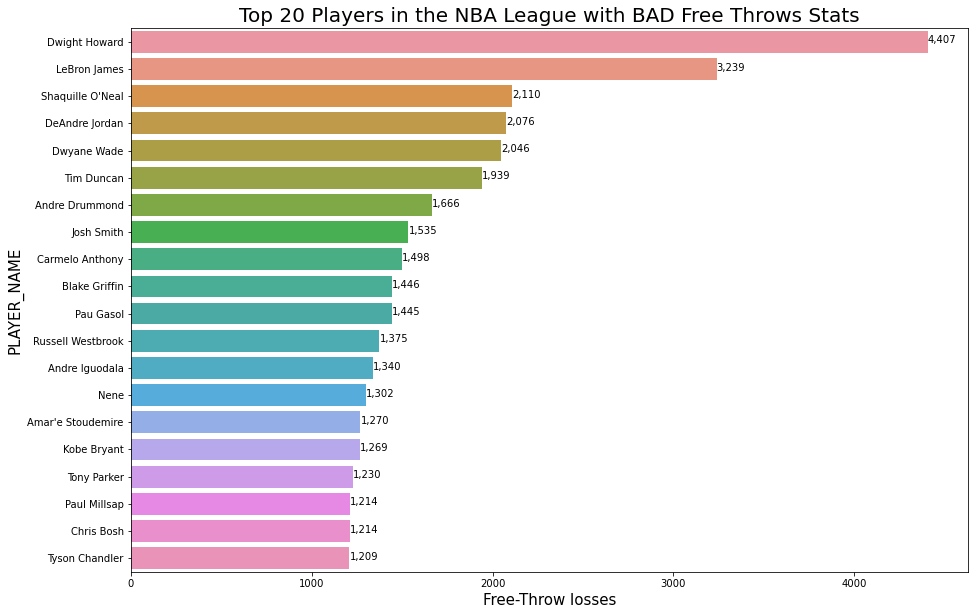

In [249]:
plt.figure(figsize=(15,10))
plt.xlabel('POINTS',fontsize=15)
plt.ylabel('PLAYER_NAME',fontsize=15)
plt.title('Top 20 Players in the NBA League with BAD Free Throws Stats',fontsize = 20)
ax = sns.barplot(x=top_Shaqtin['FTL'],y = top_Shaqtin['PLAYER_NAME'])
for i ,(value,name) in enumerate (zip(top_Shaqtin['FTL'],top_Shaqtin['PLAYER_NAME'])):
    ax.text(value, i-.05,f'{value:,.0f}',size = 10,ha='left',va='center')
ax.set(xlabel='Free-Throw losses',ylabel='PLAYER_NAME')

### We can see that these players have had the highest Free Throws L's

- The current Lakers have the top 2 (not so good at Free throw) players.
- We can see that the Big guys are not that efficient in Free Throws.


[Text(0, 0.5, 'PLAYER_NAME'), Text(0.5, 0, 'Blocks')]

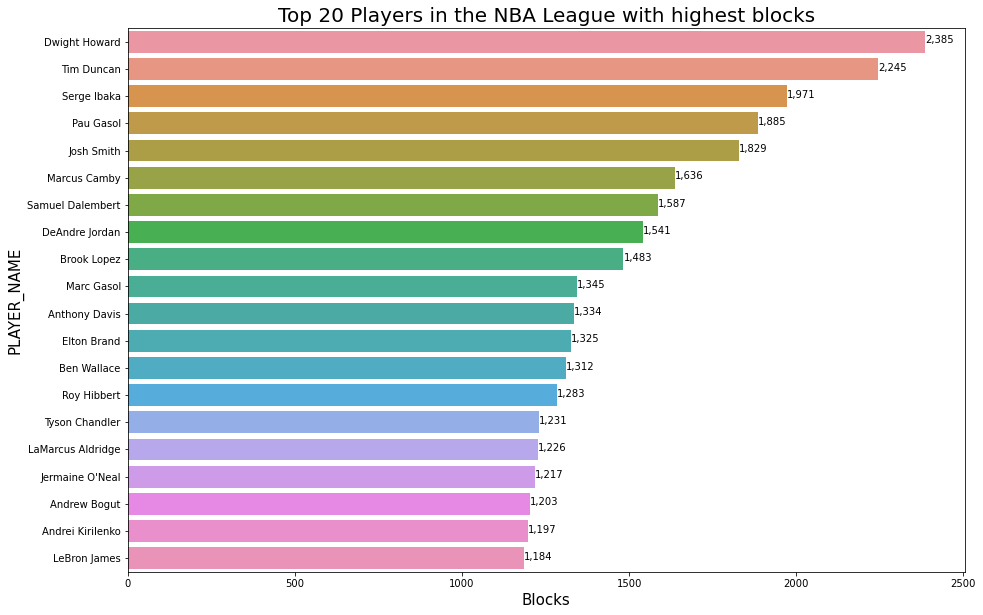

In [250]:
top_Blocks = df.groupby(by='PLAYER_NAME')['BLK'].sum().sort_values(ascending =False).head(20).reset_index()
plt.figure(figsize=(15,10))
plt.xlabel('BLOCKS',fontsize=15)
plt.ylabel('PLAYER_NAME',fontsize=15)
plt.title('Top 20 Players in the NBA League with highest blocks',fontsize = 20)
ax = sns.barplot(x=top_Blocks['BLK'],y = top_Blocks['PLAYER_NAME'])
for i ,(value,name) in enumerate (zip(top_Blocks['BLK'],top_Blocks['PLAYER_NAME'])):
    ax.text(value, i-.05,f'{value:,.0f}',size = 10,ha='left',va='center')
ax.set(xlabel='Blocks',ylabel='PLAYER_NAME')

### The above players have highest Blocks done in the NBA.
- Dwight Howard leads the chart of both the blocks and Free Throws L's, this clearly shows his role in L.A. Lakers right now.